In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 14.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 14.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 14.0 MB/s eta 0:00:00a 0:00:01


In [1]:
!pip install opencv-python


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import tensorflow as tf
import keras
import cv2
import warnings
warnings.simplefilter('ignore')
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D,Input,MaxPooling2D,Flatten,Activation,BatchNormalization,Dense,Dropout,AveragePooling2D

ModuleNotFoundError: No module named 'pandas'

In [2]:
train_dir=r"/Users/sangammalik/Downloads/data/train"
train_dir

'/Users/sangammalik/Downloads/data/train'

In [3]:
train_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                              shear_range=0.2,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1)
train_gen=train_set.flow_from_directory(train_dir,target_size=(48,48),shuffle=True,class_mode='categorical',batch_size=64,color_mode='grayscale')

Found 28820 images belonging to 7 classes.


In [4]:
train_images,train_labels=next(train_gen)

In [5]:
train_images.shape

(64, 48, 48, 1)

In [6]:
train_labels.shape

(64, 7)

In [7]:
label_names={0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}

In [8]:
l=8
w=8
fig,axes=plt.subplots(l,w,figsize=(16,12))
axes=axes.ravel()

for i in np.arange(0,l*w):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

In [16]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(7,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
train_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                              shear_range=0.2,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1)
train_gen=train_set.flow_from_directory(train_dir,target_size=(48,48),shuffle=True,class_mode='categorical',batch_size=64,color_mode='grayscale')

Found 28820 images belonging to 7 classes.


In [13]:
test_dir=r"/Users/sangammalik/Downloads/data/test"
test_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                            shear_range=0.2,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
valid_gen=test_set.flow_from_directory(test_dir,target_size=(48,48),shuffle=True,class_mode='categorical',batch_size=64,color_mode='grayscale')

Found 7066 images belonging to 7 classes.


In [14]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early_stop=EarlyStopping(monitor='val_loss',patience=2)
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_delta=0.0001)
callback=[early_stop,lr]

In [15]:
h1=model.fit(train_gen,steps_per_epoch=(28820//64),epochs=10,validation_data=valid_gen,validation_steps=(7066//64),callbacks=callback)

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 139s 306ms/step - accuracy: 0.2041 - loss: 2.1448 - val_accuracy: 0.2608 - val_loss: 1.7931 - learning_rate: 0.0010
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.2812 - loss: 1.7319 - val_accuracy: 0.2614 - val_loss: 1.7891 - learning_rate: 0.0010
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 140s 311ms/step - accuracy: 0.3273 - loss: 1.7104 - val_accuracy: 0.4013 - val_loss: 1.5586 - learning_rate: 0.0010
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 231s 514ms/step - accuracy: 0.3594 - loss: 1.5129 - val_accuracy: 0.3996 - val_loss: 1.5674 - learning_rate: 0.0010
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 122s 270ms/step - accuracy: 0.4081 - loss: 1.5166 - val_accuracy: 0.3939 - val_loss: 1.5183 - learning_rate: 0.0010
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.4219 - loss: 1.4233 - val_accuracy: 0.3912 - val_loss: 1.5231 - learning_rate: 0.0010
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 132s 294ms/step - accuracy: 0.

In [16]:
h1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

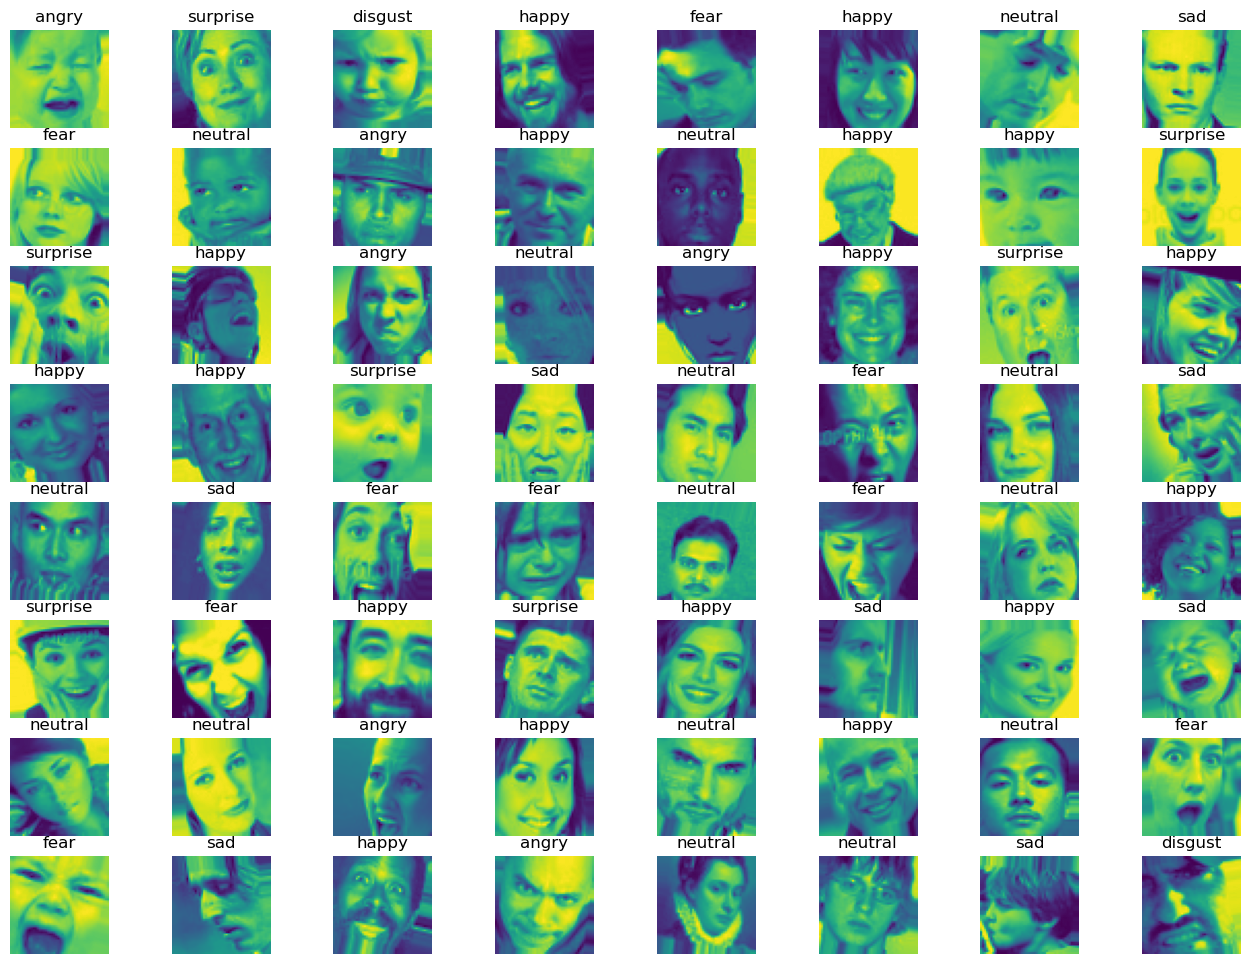

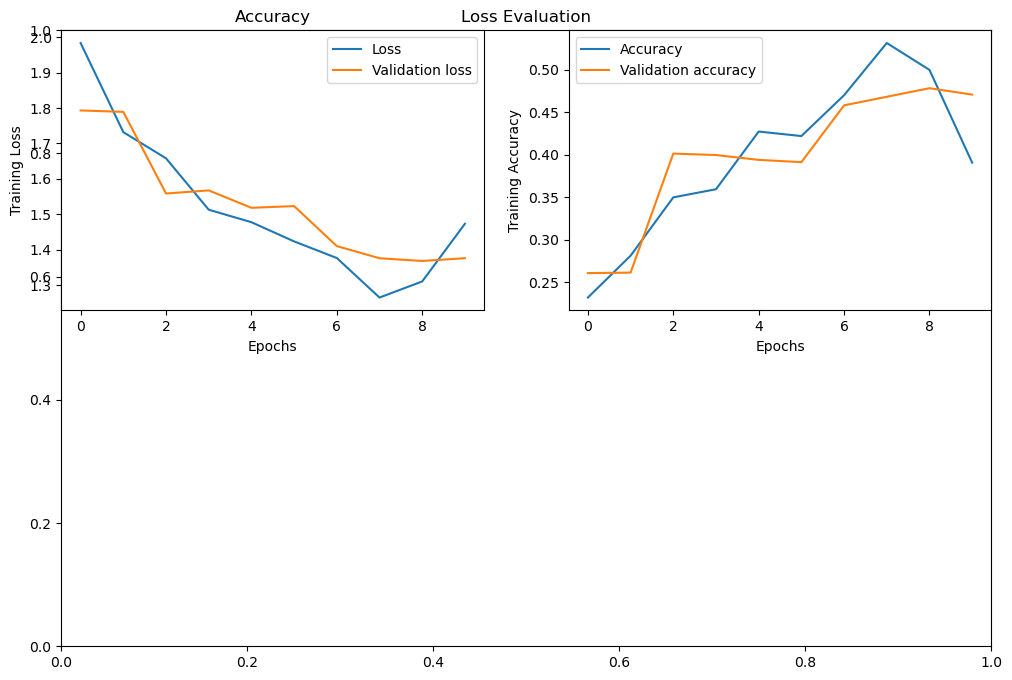

In [17]:
plt.figure(figsize=(12,8))
plt.title('Loss Evaluation')
plt.subplot(2,2,1)
plt.plot(h1.history['loss'],label='Loss')
plt.plot(h1.history['val_loss'],label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

plt.title('Accuracy')
plt.subplot(2,2,2)
plt.plot(h1.history['accuracy'],label='Accuracy')
plt.plot(h1.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

In [18]:
test_dir=r"/Users/sangammalik/Downloads/data/test"
test_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                            shear_range=0.2,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
test_gen=test_set.flow_from_directory(test_dir,target_size=(48,48),shuffle=True,class_mode='categorical',batch_size=64,color_mode='grayscale')

Found 7066 images belonging to 7 classes.


In [19]:
evaluate=model.evaluate(test_gen,steps=(7066//64),verbose=1)

110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.4815 - loss: 1.3819


In [20]:
print('Accuracy during test {}'.format(evaluate[1]))

Accuracy during test 0.4749999940395355


In [ ]:
original=[]
predictions=[]
images=[]

for i in range(len(os.listdir(test_dir))):
    for items in os.listdir(os.path.join(test_dir,label_names[i])):
        image=cv2.imread(os.path.join(test_dir,label_names[i],items))
        image=cv2.resize(image,(48,48))
        images.append(image)
        image=image/255
        image=image.reshape((-1,48,48,1))
        predict=model.predict(image)
        predict=np.argmax(predict)
        predictions.append(predict)
        original.append(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
score=accuracy_score(original,predictions)
print('Test Accuracy {}'.format(score))

Test Accuracy 0.08363996603453155


In [26]:
print(classification_report(np.asarray(original),np.asarray(predictions)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       960
           1       0.00      0.00      0.00       111
           2       0.00      0.00      0.00      1018
           3       0.26      0.31      0.28      1825
           4       0.18      0.01      0.02      1216
           5       0.18      0.01      0.03      1139
           6       0.00      0.00      0.00       797
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0

    accuracy                           0.08      7066
   macro avg       0.04      0.02      0.02      7066
weighted avg       0.13      0.08      0.08      7066



In [28]:
cm=confusion_matrix(np.asarray(original),np.asarray(predictions))
ax=plt.subplot()

sn.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Original')


Text(50.722222222222214, 0.5, 'Original')

In [30]:
train_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                              shear_range=0.2,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1)
train_gen=train_set.flow_from_directory(train_dir,target_size=(256,256),shuffle=True,class_mode='categorical',batch_size=64)

Found 28820 images belonging to 7 classes.


In [32]:
train_images,train_labels=next(train_gen)

In [34]:
train_images.shape

(64, 256, 256, 3)

In [36]:
train_labels.shape

(64, 7)

In [38]:
label_names={0:'angry',1:'disgust',2:'fear',3:'happy',4:'neutral',5:'sad',6:'surprise'}

In [40]:
l=8
w=8
fig,axes=plt.subplots(l,w,figsize=(16,12))
axes=axes.ravel()

for i in np.arange(0,l*w):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

In [42]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [44]:
basemodel=InceptionV3(weights='imagenet',include_top=False,input_tensor=Input(shape=(256,256,3)))

In [46]:
basemodel.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 127, 127,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 127, 127,  │         96 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 62, 62,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [48]:
for layers in basemodel.layers[:-10]:
    layers.trainable=False

In [50]:
from tensorflow.keras import backend as k

In [52]:
def precision(y_true,y_pred):
    true_positives=k.sum(k.round(k.clip(y_true*y_pred,0,1)))
    predicted_positives=k.sum(k.round(k.clip(y_pred,0,1)))
    precision=true_positives/(predicted_positives+k.epsilon())
    return precision
def recall(y_true,y_pred):
    true_positives=k.sum(k.round(k.clip(y_true*y_pred,0,1)))
    predicted_positives=k.sum(k.round(k.clip(y_pred,0,1)))
    recall=true_positives/(predicted_positives+k.epsilon())
    return recall
def f1(y_true,y_pred):
    def recall(y_true,y_pred):
        true_positives=k.sum(k.round(k.clip(y_true*y_pred,0,1)))
        predicted_positives=k.sum(k.round(k.clip(y_pred,0,1)))
        recall=true_positives/(predicted_positives+k.epsilon())
        return recall
    def precision(y_true,y_pred):
        true_positives=k.sum(k.round(k.clip(y_true*y_pred,0,1)))
        predicted_positives=k.sum(k.round(k.clip(y_pred,0,1)))
        precision=true_positives/(predicted_positives+k.epsilon())
        return precision
    precision=precision(y_true,y_pred)
    recall=recall(y_true,y_pred)
    return 2*((precision*recall)/(precision+recall+k.epsilon()))

In [54]:
headmodel=basemodel.output
headmodel=AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel=Flatten(name='flatten')(headmodel)

headmodel=Dense(256,activation='relu')(headmodel)
headmodel=BatchNormalization()(headmodel)
headmodel=Dropout(0.5)(headmodel)

headmodel=Dense(128,activation='relu')(headmodel)
headmodel=BatchNormalization()(headmodel)
headmodel=Dropout(0.5)(headmodel)

headmodel=Dense(64,activation='relu')(headmodel)
headmodel=BatchNormalization()(headmodel)
headmodel=Dropout(0.5)(headmodel)

headmodel=Dense(7,activation='softmax')(headmodel)

model=Model(inputs=basemodel.input,outputs=headmodel)

In [56]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
model.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 127, 127,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 127, 127,  │         96 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 62, 62,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 22,370,727 (85.34 MB)

 Trainable params: 567,239 (2.16 MB)

 Non-trainable params: 21,803,488 (83.17 MB)

In [60]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)
callback=[early_stop]

In [62]:
test_path=r"/Users/sangammalik/Downloads/data/test"
test_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                              shear_range=0.2,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1)
valid_gen=test_set.flow_from_directory(test_path,target_size=(256,256),shuffle=True,class_mode='categorical',batch_size=64)

Found 7066 images belonging to 7 classes.


In [64]:
train_gen.n,valid_gen.n

(28820, 7066)

In [66]:
train_gen.batch_size

64

In [68]:
history=model.fit(train_gen,steps_per_epoch=(train_gen.n//train_gen.batch_size),epochs=10,validation_data=valid_gen,validation_steps=(valid_gen.n//valid_gen.batch_size),callbacks=callback)

Epoch 1/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1224s 3s/step - accuracy: 0.1824 - loss: 2.4604 - val_accuracy: 0.3176 - val_loss: 1.7123
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 249s 549ms/step - accuracy: 0.2812 - loss: 1.8106 - val_accuracy: 0.3089 - val_loss: 1.7159
Epoch 3/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1274s 3s/step - accuracy: 0.2742 - loss: 1.7934 - val_accuracy: 0.3381 - val_loss: 1.6497
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 247s 546ms/step - accuracy: 0.3750 - loss: 1.5715 - val_accuracy: 0.3443 - val_loss: 1.6454
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1281s 3s/step - accuracy: 0.3130 - loss: 1.7064 - val_accuracy: 0.3608 - val_loss: 1.6143
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 257s 568ms/step - accuracy: 0.3594 - loss: 1.5403 - val_accuracy: 0.3665 - val_loss: 1.6133
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 1290s 3s/step - accuracy: 0.3325 - loss: 1.6659 - val_accuracy: 0.3706 - val_loss: 1.6014
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 386s 529ms/step - accuracy: 0.3594 - loss: 1

In [70]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend(['Training Accuracy', 'Training Loss'])

In [74]:
plt.plot(history.history['val_loss'])
plt.title('Model Loss During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(['Validation Loss'])

In [76]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(['Validation Accuracy'])

In [78]:
test_path=r"/Users/sangammalik/Downloads/data/test"
test_set=ImageDataGenerator(rotation_range=15,
                            rescale=1./255,
                              shear_range=0.2,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1)
test_gen=test_set.flow_from_directory(test_path,target_size=(256,256),shuffle=True,class_mode='categorical',batch_size=64)

Found 7066 images belonging to 7 classes.


In [80]:
evaluate = model.evaluate(test_gen, steps = test_gen.n//64, verbose = 1)

110/110 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.3773 - loss: 1.6057


In [82]:
print('Accuracy during test: {}'.format(evaluate[1]))

Accuracy during test: 0.3707386255264282


In [ ]:
predictions=[]
original=[]
images=[]

for i in range(len(os.listdir(test_path))):
    for item in os.listdir(os.path.join(test_path,str(label_names[i]))):
        image=cv2.imread(os.path.join(test_path,str(label_names[i]),item))
        image=cv2.resize(image,(256,256))
        images.append(image)
        image=image/255
        image=image.reshape((-1,256,256,3))
        predict=model.predict(image)
        predict=np.argmax(predict)
        predictions.append(predict)
        original.append(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score = accuracy_score(original,predictions)
print("Test Accuracy : {}".format(score))

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(images[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[predictions[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2)

In [ ]:
print(classification_report(np.asarray(original), np.asarray(predictions)))

In [ ]:
cm = confusion_matrix(np.asarray(original), np.asarray(predictions))
ax = plt.subplot()
sn.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')

In [23]:
model.save('model.h5')